In [1]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [2]:
'''
A list of the name of major cities, zip code, job title, college,
'''

cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia",
    "San Antonio", "San Diego", "Dallas", "San Jose", "Austin", "Jacksonville",
    "Fort Worth", "Columbus", "Charlotte", "San Francisco", "Providence", "Boston", "Miami"
]

zip_codes = [
    "02802", "02804", "02806", "02807", "02808", "02809", "02812", "02813", "02814", "02815",
    "02816", "02817", "02818", "02822", "02823", "02824", "02825", "02826", "02827", "02828",
    "02829", "02830", "02831", "02832", "02833", "02835", "02836", "02837", "02838", "02839",
    "02840", "02841", "02842", "02852", "02857", "02858", "02859", "02860", "02861", "02863",
    "02864", "02865", "02871", "02872", "02873", "02874", "02875", "02876", "02878", "02879",
    "02881", "02882", "02885", "02886", "02888", "02889", "02891", "02892", "02893", "02894",
    "02895", "02896", "02898", "02903", "02904", "02905", "02906", "02907", "02908", "02909",
    "02910", "02911", "02912", "02914", "02915", "02916", "02917", "02918", "02919", "02920",
    "02921"
]

job_titles = [
    "Software Engineer", "Data Scientist",
    "Lawyer", "Machine Learning Engineer",
    "Research Assistant", "Product Manager",
    "Marketing Coordinator", "Financial Analyst", "Human Resources Manager",
    "Sales Representative", "Graphic Designer", "Web Developer", "N/A"
]

rhode_island_colleges = [
    "Brown University",
    "University of Rhode Island",
    "Rhode Island School of Design",
    "Providence College",
    "Bryant University",
    "Roger Williams University",
    "Johnson & Wales University",
    "Rhode Island College",
    "Salve Regina University",
    "New England Institute of Technology"
]


dictionary = {
    "School Name" :   rhode_island_colleges,
    "Degree" :        ["Bachelor's", "Master's", "PhD"],
    "Location" :      cities,
    "Gender" :        ["F", "M", "N/A"],
    "Veteran status": [1, 0 , "N/A"], #1 for Yes, 0 for No, N/A for not provided
    "Work authorization" : [1, 0],
    "Disability" : [1, 0 , "N/A"],
    "Ethnicity" : ['White', 'Black', 'Native American', 'Asian American & Pacific Islander', 'Other'],
    "Role" : job_titles

}

In [3]:
def parse_date(date_str):
    '''
    Parse the date string formatted as mm/yy into a datetime object assuming the first of the month
    '''
    if date_str == "N/A":
        return None
    month, year = map(int, date_str.split('/'))
    return np.datetime64(f"20{year:02d}-{month:02d}-01")

def generate_period(start_year, end_year, prev_end_date=None):
    '''
    Generate a start and end date, ensuring the start date is after prev_end_date if provided.
    '''
    if prev_end_date and prev_end_date != "N/A":
        prev_end_date = parse_date(prev_end_date)  # Convert previous end date to datetime if not None
        prev_year = prev_end_date.astype('datetime64[Y]').astype(int) + 1970
        prev_month = prev_end_date.astype('datetime64[M]').astype(int) % 12 + 1

        # Start the new period in the next month of the previous end date
        if prev_month == 12:
            start_year = prev_year + 1
            start_month = 1
        else:
            start_year = prev_year
            start_month = prev_month + 1
    else:
        # Choose a random start month and year if no previous end date is provided
        start_year = np.random.choice(range(start_year, end_year))
        start_month = np.random.choice(range(1, 13))

    start_date = f"{start_month}/{start_year % 100:02d}"
    end_month = np.random.choice(range(start_month, 13))
    end_year = start_year
    end_date = f"{end_month}/{end_year % 100:02d}"

    return start_date, end_date


In [4]:
resume_api = 'https://jennjwang.pythonanywhere.com'
candidate_api = 'https://heonlee.pythonanywhere.com/'

Loop through White Male, Bachelor's degree,  multiple times

In [5]:
num_entries = 1

np.random.seed(0)

# Generate synthetic data
new_data = pd.DataFrame({
    'Applicant ID': range(1, 1 + num_entries),
    'School Name': "Brown University",
    'GPA': 3.50,
    'Degree': "Bachelor's",
    'Location': "Providence",
    'Gender': "M",
    'Veteran status': 0,
    'Work authorization': 0,
    'Disability': 0,
    'Ethnicity': "White",
})

# Assign roles and dates

for index in new_data.index:
    prev_end_date = None
    for i in range(1, 4):
        role_column = f'Role {i}'
        start_column = f'Start {i}'
        end_column = f'End {i}'

        # Check if previous role exists before setting current role
        if i == 1 or str(new_data.at[index, f'Role {i-1}']) != "N/A":
            new_data.at[index, role_column] = np.random.choice(job_titles + ["N/A"]*i)
            if str(new_data.at[index, role_column]) != "N/A":
              start_date, end_date = generate_period(2015, 2023, prev_end_date)
            else :
              start_date, end_date = "N/A", "N/A"
            new_data.at[index, start_column] = start_date
            new_data.at[index, end_column] = end_date
            prev_end_date = end_date  # Update previous end date to the current end date
        else:
            new_data.at[index, role_column] = "N/A"
            new_data.at[index, start_column] = "N/A"
            new_data.at[index, end_column] = "N/A"

# Combine and save data
generated_data = new_data


In [6]:
generated_data

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [7]:
# Generate a dataframe with multiple rows with same value
n_repeat = 4000
repeated_values = np.tile(generated_data.values, (n_repeat, 1))
loop_data = pd.DataFrame(repeated_values, columns = generated_data.columns)
loop_data.to_csv('generated_data.csv', index=False)

loop_data.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [8]:
# Append resume score column
json_data = loop_data.to_json(orient='records')
headers = {'Content-Type': 'application/json'}
response = requests.post(resume_api, data=json_data, headers=headers)

# resume score prediction
prediction = eval(response.json()['prediction'])
predictions = [prediction[x]['score'] for x in range(len(prediction))]  # a list of prediction for the entire dataset

loop_data['score'] = pd.DataFrame(predictions)

loop_data.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,score
0,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4.73
1,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6.75
2,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.62
3,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.64
4,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4.47


In [9]:
json_data = loop_data.to_json(orient='records')

# Send POST request to the API
headers = {'Content-Type': 'application/json'}
response = requests.post(candidate_api, data=json_data, headers=headers)

prediction = eval(response.json()['prediction'])
predictions = [int(prediction[x]['prediction']) for x in range(len(prediction))]  # a list of prediction for the entire dataset

loop_data['prediction'] = pd.DataFrame(predictions)

loop_data

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,score,prediction
0,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4.73,1
1,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6.75,0
2,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.62,1
3,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.64,1
4,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6.93,0
3996,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,5.25,1
3997,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4.86,1
3998,1,Brown University,3.5,Bachelor's,Providence,M,0,0,0,White,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,3.93,1


In [10]:
loop_data['score_num'] = [float(x) for x in loop_data['score']]

In [11]:
loop_data.describe()

,prediction,score_num
count,4000.000000,4000.000000
mean,0.627000,4.972017
std,0.483663,2.869107
min,0.000000,0.010000
25%,0.000000,2.447500
50%,1.000000,5.010000
75%,1.000000,7.410000
max,1.000000,10.000000


In [12]:
loop_data['prediction'].describe()

count    4000.000000
mean        0.627000
std         0.483663
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: prediction, dtype: float64

Pacific Islander Female

In [13]:
num_entries = 1

# Generate synthetic data
new_data = pd.DataFrame({
    'Applicant ID': range(1, 1 + num_entries),
    'School Name': "Brown University",
    'GPA': 3.50,
    'Degree': "Bachelor's",
    'Location': "Providence",
    'Gender': "F",
    'Veteran status': 0,
    'Work authorization': 0,
    'Disability': 0,
    'Ethnicity': "Native American",
    'Role 1': 'Financial Analyst',
    'Start 1': '2/15',
    'End 1': '9/15',
    'Role 2': 'Web Developer',
    'Start 2': '10/15',
    'End 2': '12/15',
    'Role 3': 'N/A',
    'Start 3': 'N/A',
    'End 3': 'N/A'
  }
)

# Combine and save data
generated_data = new_data

generated_data

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,Financial Analyst,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A


In [14]:
# Generate a dataframe with multiple rows with same value
n_repeat = 4000
repeated_values = np.tile(generated_data.values, (n_repeat, 1))
loop_data = pd.DataFrame(repeated_values, columns = generated_data.columns)
loop_data.to_csv('generated_data.csv', index=False)

# Append resume score column
json_data = loop_data.to_json(orient='records')
headers = {'Content-Type': 'application/json'}
response = requests.post(resume_api, data=json_data, headers=headers)

# resume score prediction
prediction = eval(response.json()['prediction'])
predictions = [float(prediction[x]['score']) for x in range(len(prediction))]  # a list of prediction for the entire dataset

loop_data['score'] = pd.DataFrame(predictions)

loop_data.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,score
0,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,Financial Analyst,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,0.62
1,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,Financial Analyst,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,3.06
2,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,Financial Analyst,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,4.42
3,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,Financial Analyst,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,6.97
4,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,Financial Analyst,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,5.98


In [15]:
json_data = loop_data.to_json(orient='records')

# Send POST request to the API
headers = {'Content-Type': 'application/json'}
response = requests.post(candidate_api, data=json_data, headers=headers)

prediction = eval(response.json()['prediction'])
predictions = [int(prediction[x]['prediction']) for x in range(len(prediction))]  # a list of prediction for the entire dataset

loop_data['prediction'] = pd.DataFrame(predictions)

loop_data.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,score,prediction
0,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,...,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,0.62,0
1,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,...,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,3.06,1
2,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,...,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,4.42,0
3,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,...,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,6.97,1
4,1,Brown University,3.5,Bachelor's,Providence,F,0,0,0,Native American,...,2/15,9/15,Web Developer,10/15,12/15,N/A,N/A,N/A,5.98,1


In [16]:
loop_data.describe()

,score,prediction
count,4000.000000,4000.000000
mean,5.059590,0.378750
std,2.919388,0.485136
min,0.000000,0.000000
25%,2.490000,0.000000
50%,5.090000,0.000000
75%,7.662500,1.000000
max,10.000000,1.000000


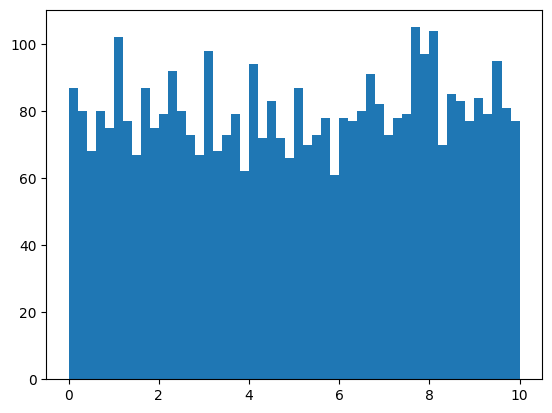

In [17]:
plt.hist(loop_data['score'], bins=50)
plt.show()